Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.5** | **Line and Circle Detection**
**Name** | Apuyan, Viktor Angelo
**Section** | CPE32S3
**Date Performed**: | February 19, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

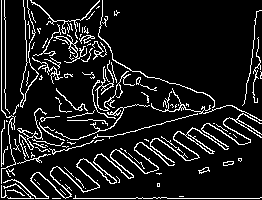

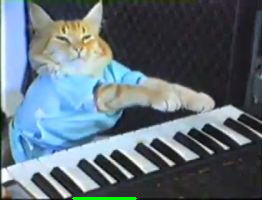

In [1]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
- From code block 1, this line "minLineLength = 20" assigns the number 20 to the variable minLineLength. This variable will be used as a parameter in the cv2.HoughLinesP function call, which detects lines in the image using the Hough Transform technique. The minLineLength parameter refers to the smallest length of a line segment to be detected by the function. Any line segments shorter than this value will be discarded.Hence, this line will, indeed, imply setting the minimum length of a line to 20 pixels.

2. What is the mathematical formula for Hough transform and explain how it finds lines.
  - This equation gives the polar representation of a line in the image:
r=x⋅cos(θ)+y⋅sin(θ), where r is the perpendicular distance from the origin to the line, θ is the angle between the x-axis and the normal of the line, and (𝑥,𝑦) are the coordinates of a point on the line. It all starts with edge detection, usually accomplished with the Canny edge detector. This establishes the vote for the line from the edges identified in the image. Every edge point does a "vote" for every possible line passing through it according to the equation, and all these individual votes contribute to a matrix representing parameter space (𝑟,𝜃). Peaks in this accumulator indicate the presence of a line, as they represent parameters that many points voted for. This method can work to allow for detection of lines even in noisy images or where the lines are actually partially broken.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

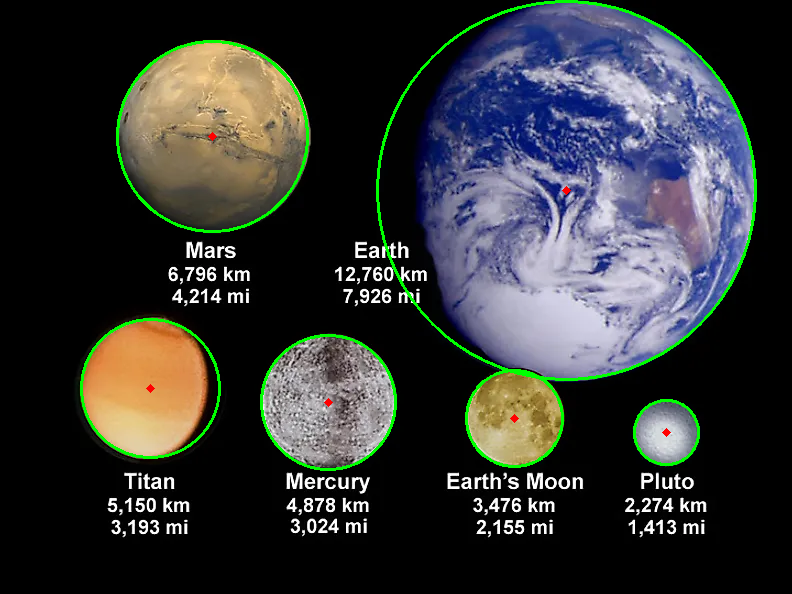

In [2]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=150,param2=40,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

With n set to 5, median blur gives very little smoothing, such that some noise is reduced but many small details are kept. Hereby the HoughCircles function had a hard time accurately detecting the planets, and therefore false circles appeared in number. Small kernel sizes are not sufficient to remove all noise, resulting in planets that were generally not detected as such.

Change the value to 9, **what happens to the image**?

Setting n to 9 lets the median blur do stronger smoothing in an effort to remove as much noise from the image as possible. This allows the HoughCircles function to detect the actual planets while, at the same time, reducing false positives. Some small details may, however, be blurred out whereas, in comparison with an n of 5, the planets will probably be picked out more accurately.

Lastly, change the value to 15, **what can you say about the resulting image?**

With n set to 15, a strong smoothing effect from the median blur would remove most noise, but would also blur important edges. As a result, the HoughCircles function may not be able to detect the planets correctly, leading to very few or even no circles being marked. The image is sufficiently smooth; howbeit the unending blurring enables the loss of salient details vital for accurate circle detection.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

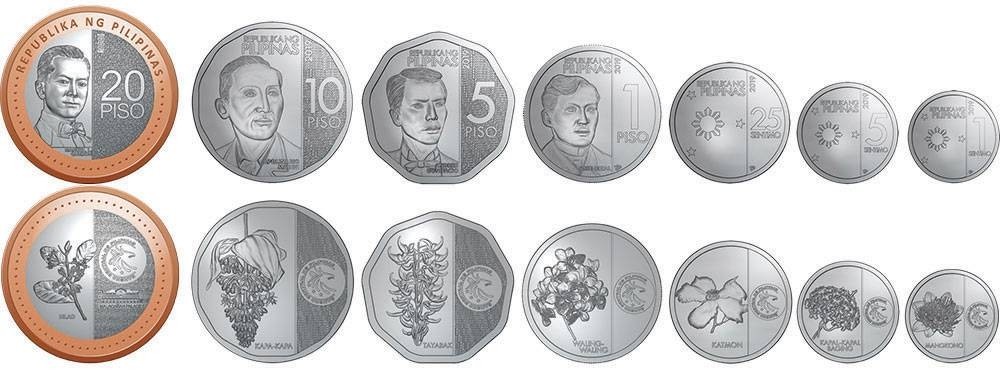

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?

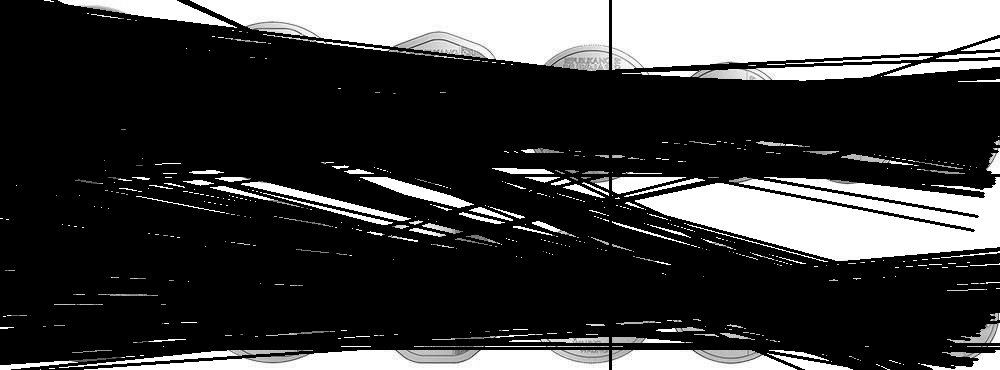

In [3]:
import numpy as np
def detect_lines(image_path):
    img = cv2.imread("/content/coins.jpg", cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

        cv2_imshow(img)
    else:
        print("No lines detected.")


    return img

detected_image = detect_lines('coins.jpg')


We can't use Hough lines in detecting circular images, as it cannot accurately represent or parameterize curves or circle. Hough lines are for straight lines within an image. How it works is that on detecting an edge, the line it resides on is represented in a parameter space (rho and theta) and combinations for potential lines are taken by votes.

Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

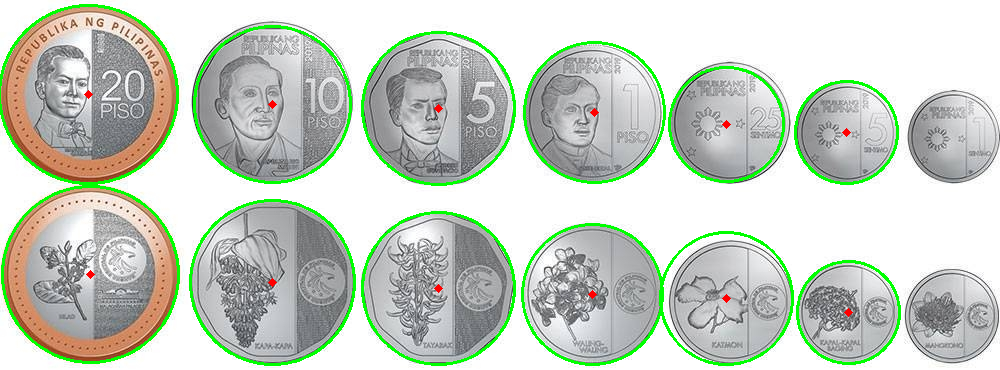

Number of circles detected: 12


In [4]:
def detect_circles(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, n)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 120,
                                param1=100, param2=40, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
        cv2_imshow(img)
        print(f"Number of circles detected: {len(circles[0])}")
        return len(circles[0])
    else:
        print("No circles detected.")
        return 0


n = 15
circle_count = detect_circles('/content/coins.jpg')


Yes, because HoughCircles is specifically made to detect circles in an image by determining their centers and radii through a voting procedure in a parameter space, so we can use it to count circles.

## 5. Summary, Conclusions and Lessons Learned

Some of the things that I learned were that in line detection with HoughLines, the algorithm operates by converting points from the image space to a parameter space in which lines may be recognized on the basis of where groups of points happen to cluster together, even if the lines are disconnected or contain gaps. I also found the significance of parameters such as the minimum line length and maximum line gap, which refine the detection to disregard noise and target meaningful lines. In circle detection employing HoughCircles, I found that the algorithm generalizes the Hough Transform to three parameters — the center coordinates and the radius — so that it detects circles of different sizes. I also learned how edge detection is very important in both methods, as good edges give more accurate line and circle detection outcomes.

From this hands-on activity, I was in a position to apply OpenCV for line and circle detection in images via the Hough Transform, acquiring hands-on experience with its APIs. I also enhanced my knowledge of how the HoughLines function finds straight lines through the transformation of edge points into a parameter space, as the HoughCircles function detects circles given their center coordinates and radius. One of the important learnings I had was that HoughLines is dedicated to detecting straight lines and won't be of use for the detection of circular shapes, while HoughCircles is devoted to detecting circles and can't be utilized for the detection of straight lines. This made it clear how imperative it is to select the detection technique according to the shapes appearing in an image, further cementing my competency in computer vision and object detection.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*